In [1]:
import lightkurve as lk
from exovetter.tce import Tce
from exovetter import vetters as vet
import matplotlib.pyplot as plt
%matplotlib notebook

%load_ext autoreload
%autoreload 2

## Running the modshift vetter on a known exoplanet

We use the previously downloaded lightcurve and TCE of wasp 18b to run the vetter (see the TCE and lightcurve example notebook)  

In [2]:
lcf = lk.read('wasp18b_lc.fits')
lc = lcf.SAP_FLUX.remove_nans().remove_outliers()
flat = lc.flatten(window_length=81)

tce = Tce.from_json('wasp18b_tce')

/var/folders/qd/p48wml6j7313gsggzbjyyj000005fl/T/ipykernel_32562/3717360116.py:2: LightkurveDeprecationWarning: The SAP_FLUX function is deprecated and may be removed in a future version.
  lc = lcf.SAP_FLUX.remove_nans().remove_outliers()


{'period': <Quantity 0.94145223 d>,
 'epoch': <Quantity 58374.669883 d>,
 'epoch_offset': <Quantity -2400000.5 d>,
 'depth': <Quantity 0.00931894>,
 'duration': <Quantity 0.08932 d>,
 'snr': 50,
 'event_name': 'WASP-18 b',
 'target_name': 'WASP-18'}

<IPython.core.display.Javascript object>


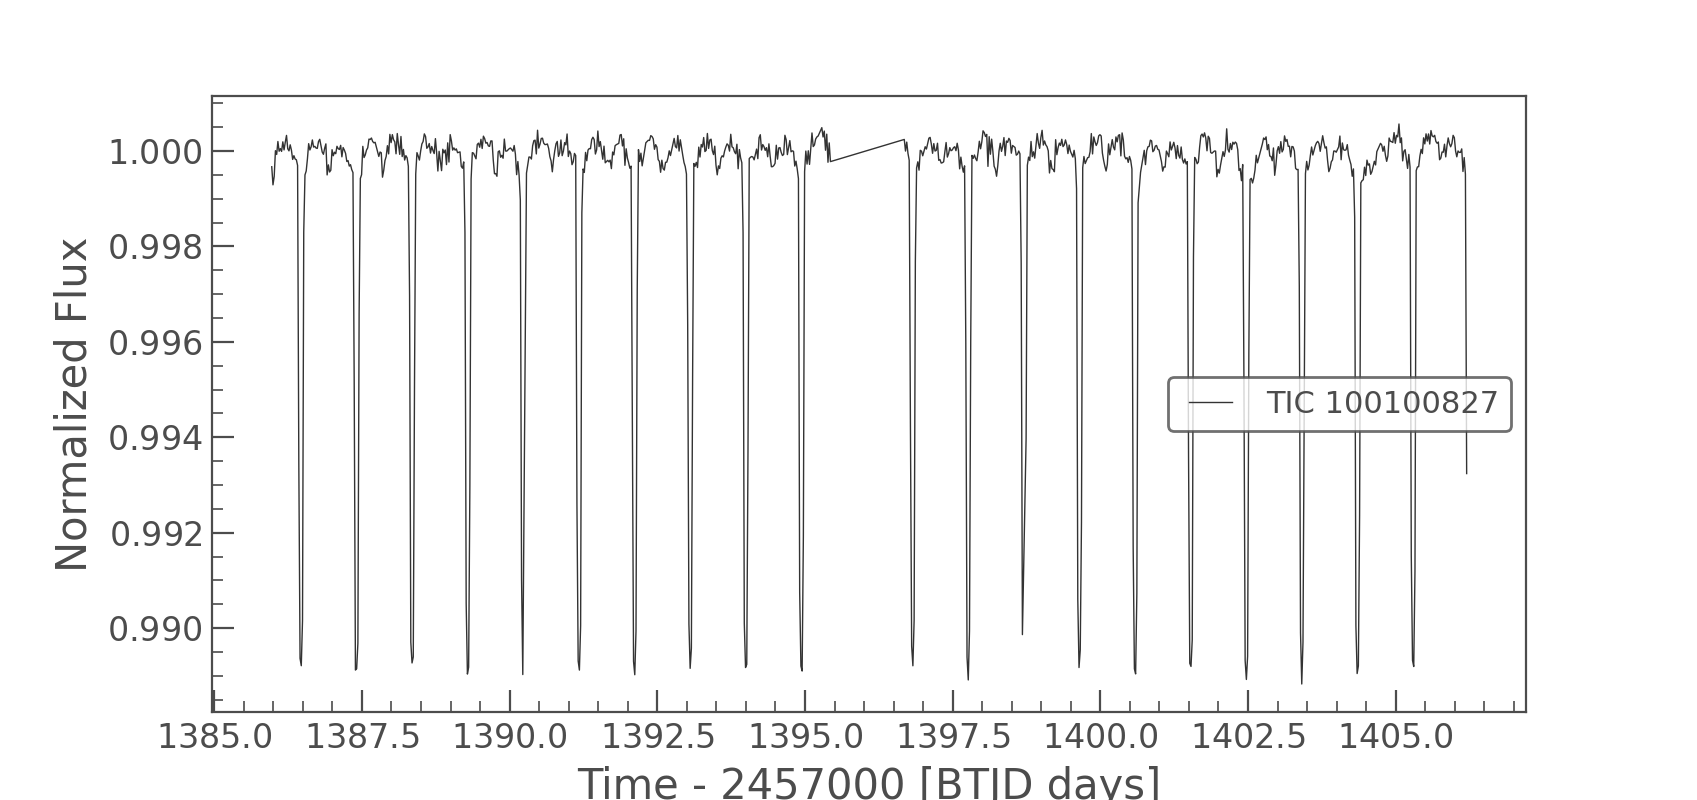

In [3]:
# View the tce and flattened lightcurve we're vetting: 
display(tce)

flat.plot()
plt.show()

## Old implementation

In [4]:
old_vetter = vet.TessTransitEventStats(raw_name='pdcsap_flux',error_name='flux_err')

old_results = old_vetter.run(tce,flat)

print("Old results:")
display(old_results)

Cadence length not specified, calculated from time array to be: 29.99985577975167 minutes
Running Metrics
Running Uniqueness Test
Old results:


({'chases': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.]),
  'rubble': array([1.04959191, 1.04959191, 1.04959191, 0.93297059, 0.69972794,
         0.93297059, 1.04959191, 1.04959191, 1.04959191, 0.93297059,
         1.04959191, 1.04959191, 0.81634926, 0.93297059, 0.81634926,
         1.04959191, 1.04959191, 1.04959191, 0.93297059, 0.93297059,
         0.34986397]),
  'Ntransits': 21,
  'transit_depth': MaskedNDArray(0.00895136),
  'newMES': MaskedNDArray(558.28122622),
  'newNtransits': 19,
  'uni_sig_pri': 567.6047683466172,
  'uni_sig_sec': 18.14304866219088,
  'uni_sig_ter': -1.3188566827239265,
  'uni_oe_dep': MaskedNDArray(1.14494792),
  'uni_mean_med': 0.9474309552569546,
  'uni_shape': 0.019342788823943156,
  'uni_Fred': 2.4592977767284254,
  'uni_sig_FA1': 4.575813277327469,
  'uni_sig_FA2': 1.6702257749203022,
  'uni_phs_pri': 0.9997959212452471,
  'uni_phs_sec': 0.5034748414740234,
  'uni_phs_ter': 0.1905208598713565,
  '

## Single Transit

Description

In [5]:
# We initialize the SingleTransit object 
# using the name of whatever array we want to be flux from the light_curve object 
single_transit = vet.SingleTransit(lc_name="flux", error_name='flux_err')

#single_transit = vet.SingleTransit(lc_name="flux")

# NOTE the SingleTransit vetter also has access to the cadence_len and error_name parameters

# We then run the vetter on the desired TCE and lightcurve which results in a dictionary of relevent metrics
single_transit_results = single_transit.run(tce,flat)

print("Results from single transit:")
display(single_transit_results)

Cadence length not specified, calculated from time array to be: 29.99985577975167 minutes
Results from single transit:


{'N_transits': 21,
 'chases': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]),
 'rubble': array([1.04959191, 1.04959191, 1.04959191, 0.93297059, 0.69972794,
        0.93297059, 1.04959191, 1.04959191, 1.04959191, 0.93297059,
        1.04959191, 1.04959191, 0.81634926, 0.93297059, 0.81634926,
        1.04959191, 1.04959191, 1.04959191, 0.93297059, 0.93297059,
        0.34986397]),
 'SES': array([139.9187464 , 133.26751891, 130.86000527, 141.51133799,
        104.48149175, 143.76627549, 132.24692002, 130.63725251,
        137.26091856, 124.01012856, 135.97147707, 131.47078576,
         84.62227145, 142.24128235, 145.65745473, 141.19576201,
        136.70685411, 137.42014532, 145.46482017, 143.35230153,
         50.04667406]),
 'in_tran': array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True,  True,  True,  Tru

In [6]:
# We can also use the built in plot method to visualize the results
single_transit.plot()

# The plot parameter can also be set to True when running the vetter, ie single_transit.run(tce, flat, plot=True)


No plotting implemented


## SNR Metrics

In [7]:
# We initialize the snr_metrics object 
# using the name of whatever array we want to be flux from the light_curve object 
#single_transit = vet.SingleTransit(lc_name="flux", error_name='flux_err')

snr_metrics = vet.SnrMetrics(lc_name="flux", error_name='flux_err')

# NOTE the SnrMetrics vetter also has access to the error_name parameter

# We then run the vetter on the desired TCE and lightcurve which results in a dictionary of relevent metrics
snr_metrics_results = snr_metrics.run(tce,flat)

print("Results from snr metrics:")
display(snr_metrics_results)


CANT GET POSITIVE SIGNIFICANCE, NO UNI_PHS_POS RESULT
Results from snr metrics:


{'SES_array': array([ 6.71318463e+00,  5.79511520e+00,  5.42555979e+00,  3.68472995e+00,
         1.36674224e+00, -5.46800018e-01, -4.96847678e-01, -1.36597921e+00,
        -7.86933622e-01, -1.41442393e+00, -2.32410315e+00, -2.50819044e+00,
        -1.88618701e+00, -2.23621885e+00, -1.67712743e+00, -2.22629370e-02,
         4.56467651e-01,  1.01963738e+00,  2.04960656e+00,  3.09606403e+00,
         2.42068831e+01,  5.91235121e+01,  9.42660446e+01,  1.26158807e+02,
         1.30722112e+02,  1.10795514e+02,  7.70337610e+01,  4.18442531e+01,
         8.69446346e+00,  3.03705817e+00,  1.09971820e+00, -1.04285235e+00,
        -1.85525633e+00, -1.67042797e+00, -1.80455490e+00, -1.69765532e+00,
        -1.58850657e+00, -2.12348851e+00, -2.15515116e+00, -1.88157687e+00,
        -1.47342595e+00, -1.01193440e+00, -6.96612682e-01,  1.30595009e+00,
         2.19226816e+00,  3.41328379e+00,  4.92991006e+00,  5.33045419e+00,
         4.00898148e+00,  3.13505760e+00,  1.87032454e+00,  2.21365000e-01,

In [8]:
# We can also use the built in plot method to visualize the results
snr_metrics.plot()

# The plot parameter can also be set to True when running the vetter, ie snr_metrics.run(tce, flat, plot=True)


CANT GET POSITIVE SIGNIFICANCE, NO UNI_PHS_POS RESULT
No plotting implemented


## Utility function: Remove_bad_transits_from_lightcurve

In [9]:
from exovetter import utils as util

remove_bad_transits = util.remove_bad_transits_from_lightcurve(single_transit_results)
remove_bad_transits

{'transit_mask': array([ True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False]),
 'lc_mask': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  Tru

<IPython.core.display.Javascript object>


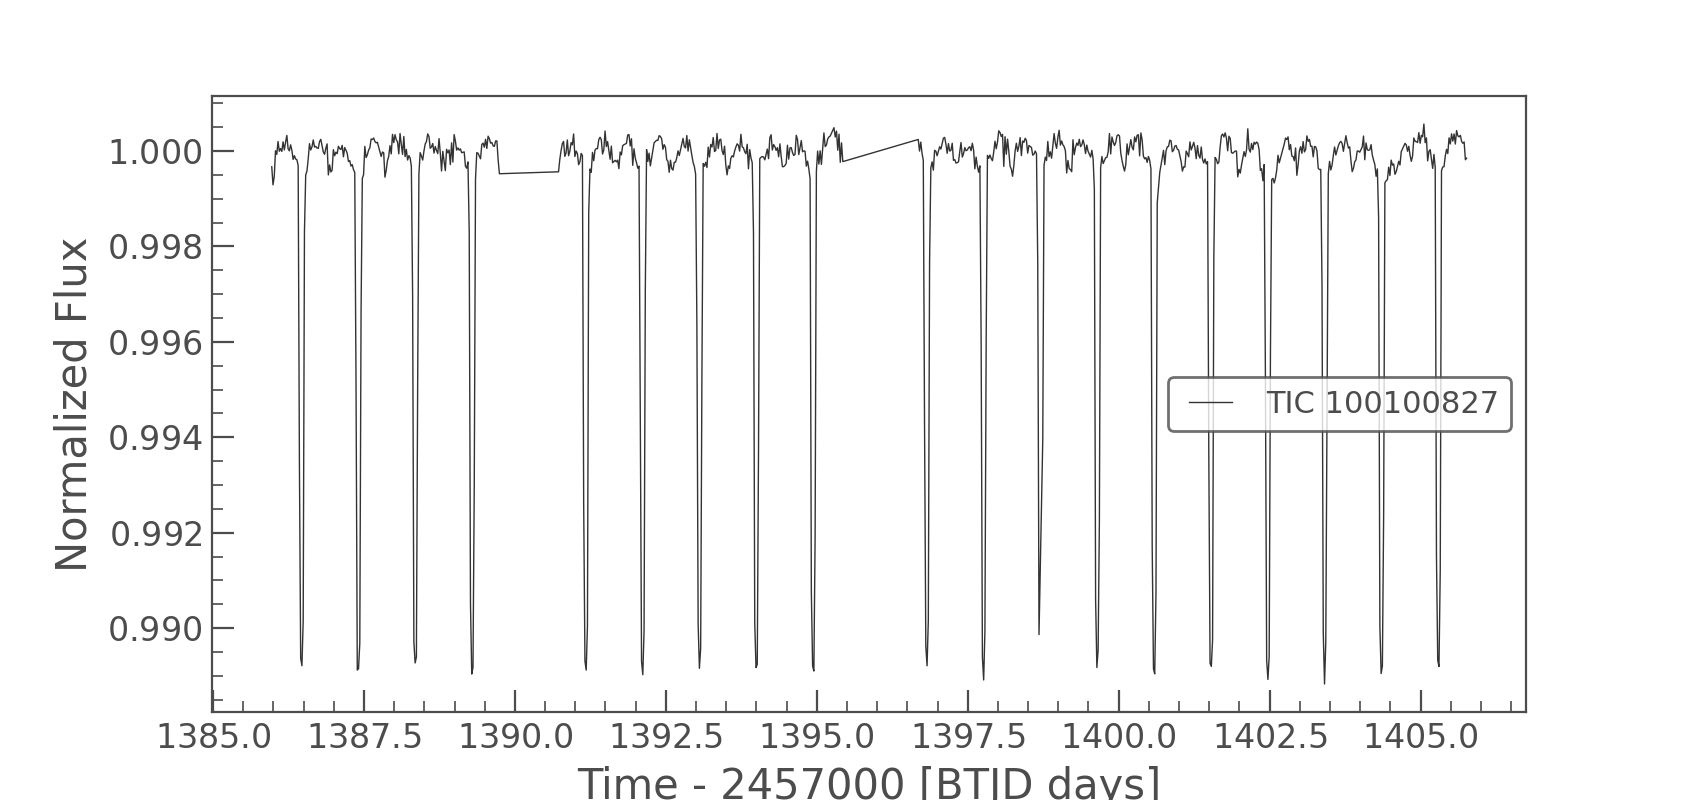

In [10]:
new_lc = flat[remove_bad_transits['lc_mask']]
new_lc.plot()
plt.show()

In [11]:
updated_snr_metrics = vet.SnrMetrics(lc_name="flux", error_name='flux_err')

updated_snr_metrics_results = updated_snr_metrics.run(tce, new_lc)

print("Results from updated snr metrics:")
display(updated_snr_metrics_results)

CANT GET POSITIVE SIGNIFICANCE, NO UNI_PHS_POS RESULT
Results from updated snr metrics:


{'SES_array': array([ 6.70187729e+00,  5.78207524e+00,  5.41092177e+00,  3.67060698e+00,
         1.35330489e+00, -5.59671360e-01, -5.09734070e-01, -1.37860852e+00,
        -7.99733918e-01, -1.42703810e+00, -2.33644832e+00, -2.52048116e+00,
        -1.89866158e+00, -2.24858946e+00, -1.68966378e+00, -3.52884844e-02,
         4.43300410e-01,  1.00630354e+00,  2.03596717e+00,  3.08211506e+00,
         2.41866804e+01,  5.90929358e+01,  9.42249866e+01,  1.26108203e+02,
         1.30670140e+02,  1.10749511e+02,  7.69978485e+01,  4.18188159e+01,
         8.67885845e+00,  3.02312736e+00,  1.08636045e+00, -1.05557692e+00,
        -1.86774044e+00, -1.68296688e+00, -1.81705400e+00, -1.71018589e+00,
        -1.60106933e+00, -2.13589322e+00, -2.16754615e+00, -1.89405273e+00,
        -1.48602215e+00, -1.02466697e+00, -7.09438434e-01,  1.29253185e+00,
         2.17858862e+00,  3.39924248e+00,  4.91541993e+00,  5.31584563e+00,
         3.99476379e+00,  3.12109778e+00,  1.85673933e+00,  2.08267743e-01,